# Importing libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
import networkx as nx
import random

In [ ]:
def lagrangian_function(beta, H, D):

In [ ]:
def deterministic_annealing(beta, beta_max, ):

# cluster generation code

In [25]:
def generate_cluster_data(num_clusters, points_per_cluster, dimensions, std_dev=1.0):
    """
    Generates synthetic cluster data with specified centroids and data points.

    Args:
        num_clusters (int): The number of clusters to generate.
        points_per_cluster (int): The number of data points for each cluster.
        dimensions (int): The number of dimensions for the data points.
        std_dev (float): The standard deviation (spread) of points within each cluster.

    Returns:
        tuple: A tuple containing:
            - all_data (np.ndarray): The combined array of all data points.
            - centroids (np.ndarray): The array of cluster centroid positions.
            - labels (np.ndarray): An array of labels indicating which cluster each data point belongs to.
    """
    # 1. Generate random centroid positions
    # We'll create centroids in a random space. Here, a 20x20 box for 2D data.
    centroids = np.random.rand(num_clusters, dimensions) * 20 - 10

    all_data = []
    labels = []

    # 2. For each centroid, generate cluster points
    for i, centroid in enumerate(centroids):
        # Generate random points around the current centroid
        # np.random.randn() gives a standard normal distribution (mean=0, std=1)
        # We scale it by std_dev and then shift it by the centroid's position
        cluster_points = np.random.randn(points_per_cluster, dimensions) * std_dev + centroid
        
        # Add the generated points to our main data array
        all_data.append(cluster_points)
        
        # Create labels for each point in the cluster
        cluster_labels = np.full(points_per_cluster, i)
        labels.append(cluster_labels)

    # 3. Combine all data points and labels into single NumPy arrays
    all_data = np.vstack(all_data)
    labels = np.hstack(labels)

    return all_data, centroids, labels

# --- Main Script ---

if __name__ == "__main__":
    # Parameters for our synthetic data
    num_clusters = 4
    points_per_cluster = 100
    dimensions = 3
    std_dev = 1.5

    # Generate the data
    data_points, true_centroids, cluster_labels = generate_cluster_data(
        num_clusters, points_per_cluster, dimensions, std_dev
    )

    # Print the shapes to verify
    print(f"Shape of generated data points: {data_points.shape}")
    print(f"Shape of true centroids: {true_centroids.shape}")
    print(f"Shape of cluster labels: {cluster_labels.shape}")

    print(data_points)
    print(true_centroids)
    print(cluster_labels)

    # Visualize the results (for 2D data)
    if dimensions == 2:
        plt.figure(figsize=(10, 8))
        
        # Plot data points, colored by their true cluster labels
        plt.scatter(data_points[:, 0], data_points[:, 1], c=cluster_labels, s=20, alpha=0.7)
        
        # Plot the true centroid positions
        plt.scatter(true_centroids[:, 0], true_centroids[:, 1], c='red', marker='X', s=200, label='True Centroids')
        
        plt.title(f'Synthetic Clustered Data with {num_clusters} Clusters')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.grid(True)
        plt.show()

Shape of generated data points: (400, 3)
Shape of true centroids: (4, 3)
Shape of cluster labels: (400,)
[[ -0.78447133  12.90306538  -8.04623272]
 [ -0.22022884   8.42198504  -0.69659009]
 [  1.78887025   9.22164116  -6.15365573]
 ...
 [ -5.92702644  -1.09383721  -1.15334316]
 [-12.04161988  -0.76166538   3.57039628]
 [ -8.63111913  -2.72381144  -0.17987855]]
[[-0.01407695  9.20264793 -5.1022529 ]
 [-0.83592158  0.29113627  5.23215602]
 [-7.34982649  7.8457676   3.99134249]
 [-8.4006611  -0.43005478  2.12810442]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

# general da code for clustering

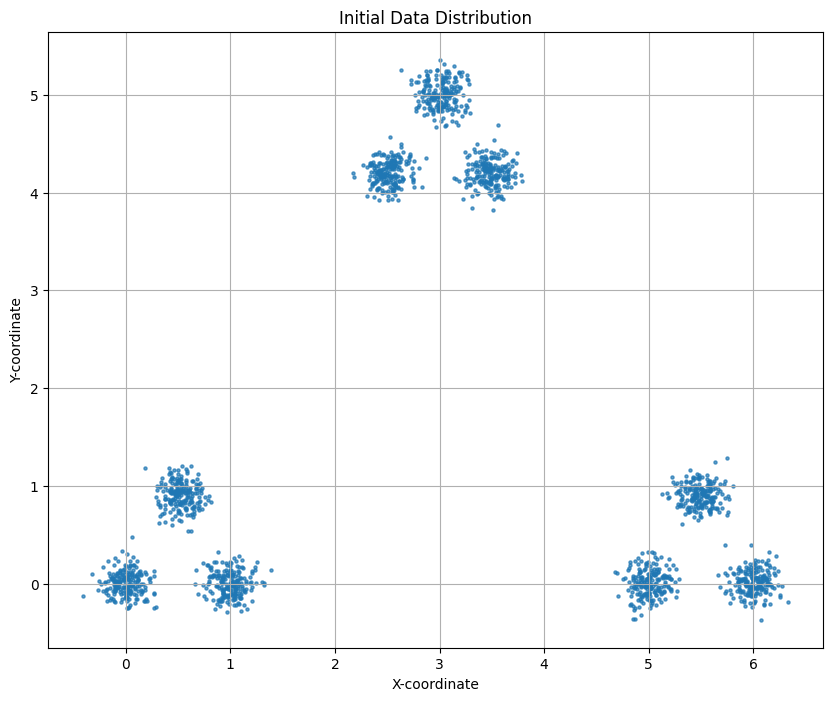

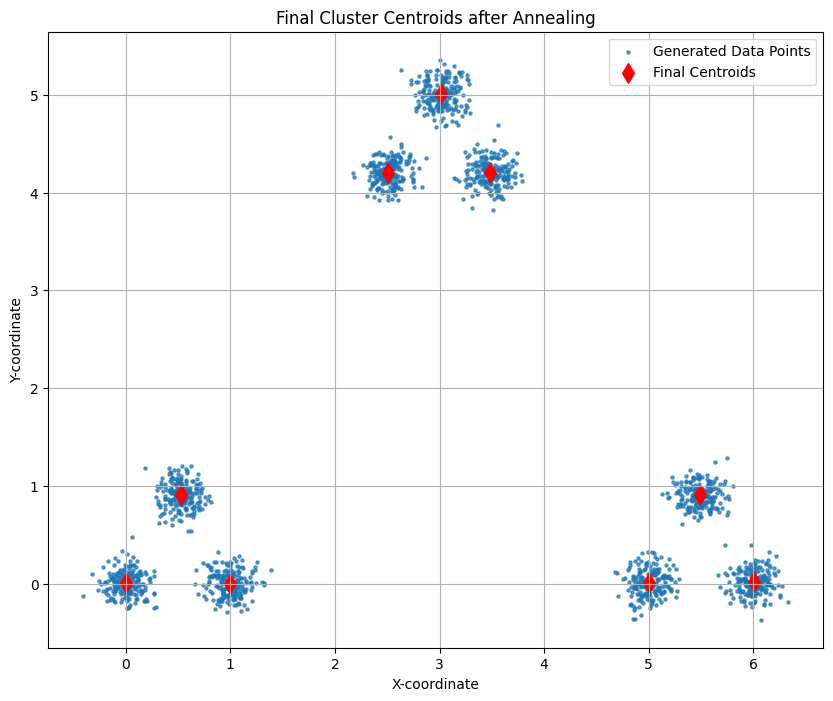

Clustering process completed.
Final Centroids:
[[ 0.06208927 -0.01728304]
 [ 0.08096107  0.19037873]
 [-0.02926917 -0.02926712]
 ...
 [ 3.15740415  5.14330511]
 [ 2.87832765  5.12589167]
 [ 3.04201812  4.97156547]]
[[ 5.48875006e+00  9.04818075e-01]
 [ 9.96922827e-01 -1.96813054e-03]
 [ 5.27861513e-01  9.12323353e-01]
 [ 5.00492585e+00  8.64620237e-03]
 [ 3.01504374e+00  5.00795333e+00]
 [ 2.51169333e+00  4.20335271e+00]
 [ 4.74383822e-03  8.96313934e-03]
 [ 6.00275822e+00  1.73092409e-02]
 [ 3.48485324e+00  4.20169503e+00]]


In [125]:
# %% This code implements the actual DA algorithm where we increase the
# number of clusters when the condition for phase transition is satisfied.
# Note: The provided MATLAB code implements a fixed-K annealing algorithm.
# The logic for dynamically increasing clusters is not present in the original snippet.

# Set a random seed for reproducibility, similar to MATLAB's `rng('default')`.
np.random.seed(42)

# Define a helper function to calculate the squared Euclidean distance matrix.
# This replaces the `distortion` function call in the original MATLAB code.
def calculate_distortion(X, Y):
    """
    Calculates the squared Euclidean distance between each point in X and each centroid in Y.
    Args:
        X (np.ndarray): The data matrix of shape (M, N).
        Y (np.ndarray): The centroid matrix of shape (K, N).
    Returns:
        np.ndarray: A distance matrix of shape (M, K).
    """
    # X_sum_sq is a column vector of shape (M, 1)
    X_sum_sq = np.sum(X**2, axis=1, keepdims=True)
    
    # Y_sum_sq is a row vector of shape (1, K)
    Y_sum_sq = np.sum(Y**2, axis=1, keepdims=True).T
    
    # D is the squared Euclidean distance matrix using the formula:
    # ||x - y||^2 = ||x||^2 + ||y||^2 - 2 * x.T * y
    D = X_sum_sq + Y_sum_sq - 2 * X @ Y.T
    return D

# %% Constructing Data Set 6
# Define the centers of the nine clusters
C1 = np.array([0, 0])
C2 = np.array([1, 0])
C3 = np.array([0.5, 0.9])
C4 = np.array([5, 0])
C5 = np.array([6, 0])
C6 = np.array([5.5, 0.9])
C7 = np.array([2.5, 4.2])
C8 = np.array([3.5, 4.2])
C9 = np.array([3, 5])
Centers = np.array([C1, C2, C3, C4, C5, C6, C7, C8, C9])

# Number of points per cluster
Np = 200
num_clusters = len(Centers)
total_points = num_clusters * Np

# Standard deviation for generating data points
std_dev = 0.125

# Create the data matrix X
X = np.zeros((total_points, 2))
count = 0
for i in range(num_clusters):
    for _ in range(Np):
        x = np.random.normal(Centers[i, 0], std_dev)
        y = np.random.normal(Centers[i, 1], std_dev)
        X[count, :] = [x, y]
        count += 1

# Plot the initial generated data
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=0.7, label='Generated Data Points')
plt.title('Initial Data Distribution')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid(True)
plt.show()

# Get the dimensions of the data matrix
M, N = X.shape

# %% Setting for DA parameters
K = 9                       # Number of clusters
Tmin = 0.05                 # Minimum temperature
alpha = 0.99                # Annealing rate
PERTURB = 0.005             # Perturbation factor
STOP = 1e-5                 # Stopping criterion for inner loop
T = 80                      # Initial temperature

# Px is the weight for each data point, assuming uniform weights
Px = np.full((M, 1), 1 / M)

# Y is the matrix of cluster centroids, initialized to the weighted mean of the data.
# This corresponds to `Y = repmat(Px'*X, [K,1])` in MATLAB.
initial_mean = (Px.T @ X).reshape(1, -1)
Y = np.tile(initial_mean, (K, 1))

# Start the annealing process
while T >= Tmin:
    L_old = np.inf
    while True:
        # Calculate distortion matrix D
        D = calculate_distortion(X, Y)

        # Calculate the probability matrix P using the softmax function
        # This replaces the `exp`, `sum`, and `repmat` operations from MATLAB
        num = np.exp(-D / T)
        den = np.sum(num, axis=1, keepdims=True)
        P = num / den

        # Update the cluster centroids Y
        # This replaces `P'*(X.*repmat(Px,[1 N]))./repmat(Py,[1 N])`
        Py = P.T @ Px
        Py[Py == 0] = 1e-10  # Avoid division by zero
        Y = (P.T @ (X * Px)) / Py.reshape(-1, 1)

        # Add a small random perturbation to the centroids
        Y += PERTURB * np.random.rand(*Y.shape)
        
        # Calculate the loss function L
        L = -T * Px.T @ np.log(np.sum(np.exp(-D / T), axis=1, keepdims=True))

        # Check for convergence
        if np.linalg.norm(L - L_old) < STOP:
            break

        # Update L_old for the next iteration
        L_old = L

        # print(np.linalg.norm(L - L_old))
        # print(Y)

    # Decrease the temperature for the next outer loop iteration
    T *= alpha

# Plot the final result
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=0.7, label='Generated Data Points')
plt.scatter(Y[:, 0], Y[:, 1], marker='d', s=100, color='red', label='Final Centroids')
plt.title('Final Cluster Centroids after Annealing')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.show()

print("Clustering process completed.")
print("Final Centroids:")
print(X)
print(Y)

# DA for graph aggregation

## random graph generation

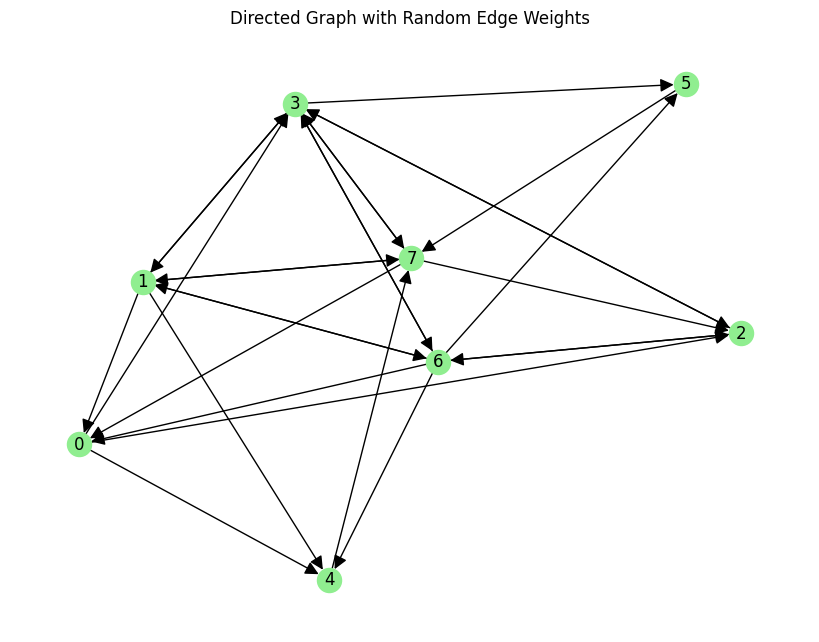

{(0, 2): 2, (0, 3): 1, (0, 4): 5, (1, 0): 4, (1, 3): 4, (1, 4): 3, (1, 6): 2, (1, 7): 9, (2, 3): 2, (2, 6): 10, (3, 1): 7, (3, 2): 1, (3, 5): 1, (3, 6): 2, (3, 7): 4, (4, 7): 4, (5, 7): 9, (6, 0): 10, (6, 1): 1, (6, 2): 9, (6, 3): 4, (6, 4): 9, (6, 5): 7, (7, 0): 4, (7, 1): 8, (7, 2): 10, (7, 3): 5}


In [126]:
import numpy as np
import random

np.random.seed(42)
random.seed(42)

def generate_directed_graph_with_weights(num_nodes, edge_prob=0.4, weight_range=(1, 10), seed=None):
    """
    Generates a directed graph with random edge weights.
    Args:
        num_nodes (int): Number of nodes in the graph.
        edge_prob (float): Probability of edge creation between nodes.
        weight_range (tuple): Range (min, max) for random edge weights.
        seed (int): Random seed for reproducibility.
    Returns:
        G (nx.DiGraph): A directed graph with weighted edges.
    """
    G = nx.gnp_random_graph(num_nodes, edge_prob, directed=True, seed=seed)
    for (u, v) in G.edges():
        G[u][v]['weight'] = random.randint(*weight_range)
    return G

# Example usage
num_nodes = 8
edge_prob = 0.4
weight_range = (1, 10)
seed = 42
G = generate_directed_graph_with_weights(num_nodes, edge_prob, weight_range, seed=seed)

# Draw the graph with edge weights
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightgreen', arrowsize=20, arrowstyle='-|>')
edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Directed Graph with Random Edge Weights')
plt.show()

print(edge_labels)

## da algorithm for graph aggregation

In [155]:
D

array([[ 33.515625,  33.515625,  33.515625],
       [ 53.515625,  53.515625,  53.515625],
       [100.765625, 100.765625, 100.765625],
       [ 42.265625,  42.265625,  42.265625],
       [ 29.765625,  29.765625,  29.765625],
       [ 62.265625,  62.265625,  62.265625],
       [201.015625, 201.015625, 201.015625],
       [119.765625, 119.765625, 119.765625]])

In [159]:
D = D - np.min(D, axis=1, keepdims=True)
D

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

[[ 0.  0.  2.  1.  5.  0.  0.  0.]
 [ 4.  0.  0.  4.  3.  0.  2.  9.]
 [ 0.  0.  0.  2.  0.  0. 10.  0.]
 [ 0.  7.  1.  0.  0.  1.  2.  4.]
 [ 0.  0.  0.  0.  0.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.  0.  0.  9.]
 [10.  1.  9.  4.  9.  7.  0.  0.]
 [ 4.  8. 10.  5.  0.  0.  0.  0.]]
[[ 0.  0.  2.  1.  5.  0.  0.  0.]
 [ 4.  0.  0.  4.  3.  0.  2.  9.]
 [ 0.  0.  0.  2.  0.  0. 10.  0.]
 [ 0.  7.  1.  0.  0.  1.  2.  4.]
 [ 0.  0.  0.  0.  0.  0.  0.  4.]
 [ 0.  0.  0.  0.  0.  0.  0.  9.]
 [10.  1.  9.  4.  9.  7.  0.  0.]
 [ 4.  8. 10.  5.  0.  0.  0.  0.]] 
 [[2.25  2.    2.75  2.    2.125 1.    1.75  3.25 ]
 [2.25  2.    2.75  2.    2.125 1.    1.75  3.25 ]
 [2.25  2.    2.75  2.    2.125 1.    1.75  3.25 ]]
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.3333

C:\Users\ashha\AppData\Local\Temp\ipykernel_24112\3196881048.py:126: RuntimeWarning: divide by zero encountered in log
  L = -T * Px.T @ np.log(np.sum(np.exp(-D / T), axis=1, keepdims=True))
C:\Users\ashha\AppData\Local\Temp\ipykernel_24112\3196881048.py:131: RuntimeWarning: invalid value encountered in subtract
  if np.linalg.norm(L - L_old) < STOP or np.linalg.norm(L - L_old) == None:


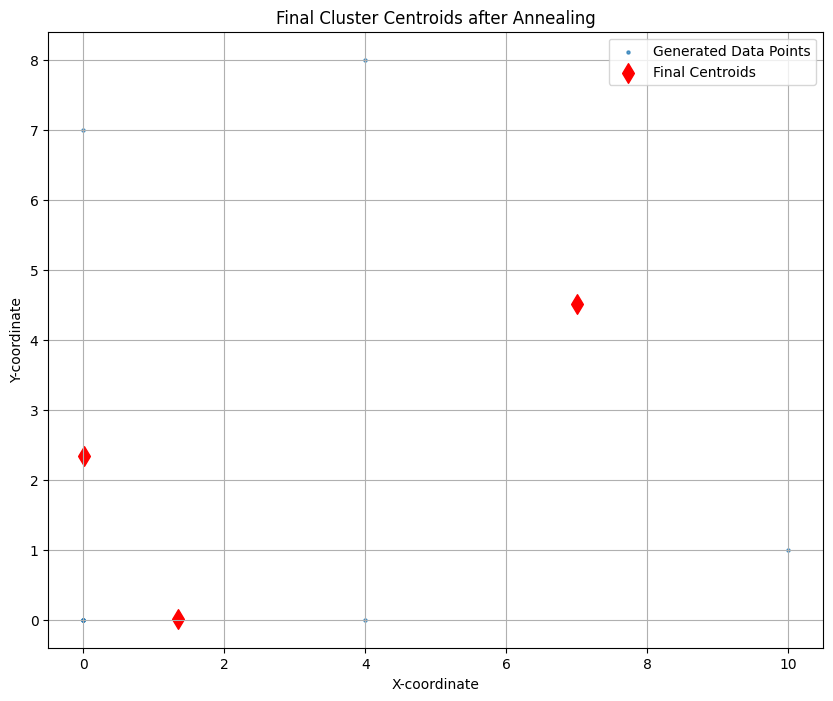

Clustering process completed.
Final Centroids:
[[2.06275433e-03 2.33768025e+00 1.00128125e+00 1.00254917e+00
  1.66767906e+00 3.37185019e-01 4.00248801e+00 1.33601470e+00]
 [1.33763061e+00 3.69608709e-03 4.83132978e-03 1.33536001e+00
  1.00230727e+00 3.07669343e-03 6.68933229e-01 7.33543141e+00]
 [7.00170286e+00 4.50415942e+00 9.50266745e+00 4.50303702e+00
  4.50102038e+00 3.50125888e+00 1.69896604e-03 2.32684488e-03]]
[[1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 9.93793500e-273 0.00000000e+000]
 [3.12907279e-151 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 0.00000000e+000 1.00000000e+000]]


In [161]:
# %% This code implements the actual DA algorithm where we increase the
# number of clusters when the condition for phase transition is satisfied.
# Note: The provided MATLAB code implements a fixed-K annealing algorithm.
# The logic for dynamically increasing clusters is not present in the original snippet.

np.random.seed(42)

# Define a helper function to calculate the squared Euclidean distance matrix.
# This replaces the `distortion` function call in the original MATLAB code.
def calculate_distortion(X, Y):
    """
    Calculates the squared Euclidean distance between each point in X and each centroid in Y.
    Args:
        X (np.ndarray): The data matrix of shape (M, N).
        Y (np.ndarray): The centroid matrix of shape (K, N).
    Returns:
        np.ndarray: A distance matrix of shape (M, K).
    """
    # X_sum_sq is a column vector of shape (M, 1)
    X_sum_sq = np.sum(X**2, axis=1, keepdims=True)
    
    # Y_sum_sq is a row vector of shape (1, K)
    Y_sum_sq = np.sum(Y**2, axis=1, keepdims=True).T
    
    # D is the squared Euclidean distance matrix using the formula:
    # ||x - y||^2 = ||x||^2 + ||y||^2 - 2 * x.T * y
    D = X_sum_sq + Y_sum_sq - 2 * X @ Y.T
    return D

# # %% Constructing Data Set 6
# # Define the centers of the nine clusters
# C1 = np.array([0, 0])
# C2 = np.array([1, 0])
# C3 = np.array([0.5, 0.9])
# C4 = np.array([5, 0])
# C5 = np.array([6, 0])
# C6 = np.array([5.5, 0.9])
# C7 = np.array([2.5, 4.2])
# C8 = np.array([3.5, 4.2])
# C9 = np.array([3, 5])
# Centers = np.array([C1, C2, C3, C4, C5, C6, C7, C8, C9])

# # Number of points per cluster
# Np = 200
# num_clusters = len(Centers)
# total_points = num_clusters * Np

# # Standard deviation for generating data points
# std_dev = 0.125

# # Create the data matrix X
# X = np.zeros((total_points, 2))
# count = 0
# for i in range(num_clusters):
#     for _ in range(Np):
#         x = np.random.normal(Centers[i, 0], std_dev)
#         y = np.random.normal(Centers[i, 1], std_dev)
#         X[count, :] = [x, y]
#         count += 1

# # Plot the initial generated data
# plt.figure(figsize=(10, 8))
# plt.scatter(X[:, 0], X[:, 1], s=5, alpha=0.7, label='Generated Data Points')
# plt.title('Initial Data Distribution')
# plt.xlabel('X-coordinate')
# plt.ylabel('Y-coordinate')
# plt.grid(True)
# plt.show()

X = np.zeros((num_nodes, num_nodes))

for i in range(num_nodes):
    for j in range(num_nodes):
        try:
            X[i,j] = edge_labels[(i,j)]
        except:
            pass

print(X)

#Get the dimensions of the data matrix
M, N = X.shape

# %% Setting for DA parameters
K = 3                       # Number of clusters
Tmin = 0.05                 # Minimum temperature
alpha = 0.99                # Annealing rate
PERTURB = 0.005             # Perturbation factor
STOP = 1e-5                 # Stopping criterion for inner loop
T = 80                      # Initial temperature

# Px is the weight for each data point, assuming uniform weights
Px = np.full((M, 1), 1 / M)

# Y is the matrix of cluster centroids, initialized to the weighted mean of the data.
# This corresponds to `Y = repmat(Px'*X, [K,1])` in MATLAB.
initial_mean = (Px.T @ X).reshape(1, -1)
Y = np.tile(initial_mean, (K, 1))

print(X,'\n',Y)

# Start the annealing process
while T >= Tmin:
    L_old = np.inf
    while True:
        # Calculate distortion matrix D
        D = calculate_distortion(X, Y)

        # Calculate the probability matrix P using the softmax function
        # This replaces the `exp`, `sum`, and `repmat` operations from MATLAB
        D_bar = D - np.min(D, axis=1, keepdims=True)
        num = np.exp(-D_bar / T)
        den = np.sum(num, axis=1, keepdims=True)
        P = num / den

        # Update the cluster centroids Y
        # This replaces `P'*(X.*repmat(Px,[1 N]))./repmat(Py,[1 N])`
        Py = P.T @ Px
        Py[Py == 0] = 1e-10  # Avoid division by zero
        Y = (P.T @ (X * Px)) / Py.reshape(-1, 1)

        # Add a small random perturbation to the centroids
        Y += PERTURB * np.random.rand(*Y.shape)
        
        # Calculate the loss function L
        L = -T * Px.T @ np.log(np.sum(np.exp(-D / T), axis=1, keepdims=True))

        # print(L,L_old,np.linalg.norm(L - L_old))

        # Check for convergence
        if np.linalg.norm(L - L_old) < STOP or np.linalg.norm(L - L_old) == None:
            break

        if L == [np.inf]:
            break

        # Update L_old for the next iteration
        L_old = L

        # print(T,D)

        print(P)

    # Decrease the temperature for the next outer loop iteration
    T *= alpha

# Plot the final result
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], s=5, alpha=0.7, label='Generated Data Points')
plt.scatter(Y[:, 0], Y[:, 1], marker='d', s=100, color='red', label='Final Centroids')
plt.title('Final Cluster Centroids after Annealing')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.grid(True)
plt.show()

print("Clustering process completed.")
print("Final Centroids:")
print(Y)

print(P)

In [132]:
1.5236944577168288e-06 < 1e-5

True